In [2]:
# Life Expectancy Data Analysis & Machine Learning Project

# Import Libraries
print("""
In this step, I imported all the essential Python libraries that I used throughout the life expectancy project:

- pandas: Used for reading and manipulating the dataset.
- numpy: Helps with numerical operations like filling missing values using the median.
- matplotlib.pyplot and seaborn: These libraries are used for static data visualizations such as histograms, bar charts, and heatmaps to uncover patterns and trends in the dataset.
- plotly.express: Used to create interactive visualizations, such as animated scatter plots and choropleth maps, which are helpful for engaging presentations.
- sklearn.model_selection: Provides functions to split the data into training and testing sets and validate models.
- sklearn.preprocessing: Used to normalize data using StandardScaler and encode categorical features using LabelEncoder.
- sklearn.ensemble.RandomForestRegressor: A machine learning model that creates multiple decision trees and outputs the average to improve accuracy and avoid overfitting.
- xgboost.XGBRegressor: Another machine learning algorithm that uses gradient boosting for more accurate and optimized predictions.
- sklearn.metrics: Offers tools to evaluate model performance using metrics like RMSE (Root Mean Square Error) and R-squared.
- warnings: This is used to suppress any warning messages to keep the notebook output clean.

These libraries collectively support the entire pipeline of data loading, exploration, visualization, modeling, and interpretation.
""")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In this step, I imported all the essential Python libraries that I used throughout the life expectancy project:

- pandas: Used for reading and manipulating the dataset.
- numpy: Helps with numerical operations like filling missing values using the median.
- matplotlib.pyplot and seaborn: These libraries are used for static data visualizations such as histograms, bar charts, and heatmaps to uncover patterns and trends in the dataset.
- plotly.express: Used to create interactive visualizations, such as animated scatter plots and choropleth maps, which are helpful for engaging presentations.
- sklearn.model_selection: Provides functions to split the data into training and testing sets and validate models.
- sklearn.preprocessing: Used to normalize data using StandardScaler and encode categorical features using LabelEncoder.
- sklearn.ensemble.RandomForestRegressor: A machine learning model that creates multiple decision trees and outputs the average to improve accuracy and avoid overfit

In [3]:
# Load the Dataset
print("""
In this step, I loaded the dataset 'Life Expectancy Data.csv' using pandas' read_csv function. This function reads the CSV file and converts it into a DataFrame, which is a structured, tabular format used throughout this project.

After loading, I used the head() function to display the first few rows. This helps to quickly verify that the data loaded correctly and gives an initial view of the columns, data types, and potential anomalies (such as unexpected null values or formats).
""")
df = pd.read_csv("Life Expectancy Data.csv")
df.head()


In this step, I loaded the dataset 'Life Expectancy Data.csv' using pandas' read_csv function. This function reads the CSV file and converts it into a DataFrame, which is a structured, tabular format used throughout this project.

After loading, I used the head() function to display the first few rows. This helps to quickly verify that the data loaded correctly and gives an initial view of the columns, data types, and potential anomalies (such as unexpected null values or formats).



Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
# Basic Info & Null Check
print("""
In this part, I explored the structure of the dataset by using:

- df.info(): to check data types and see how many non-null entries are present in each column.
- df.isnull().sum(): to count how many missing values exist in each column.

This step is essential for identifying which columns may need to be cleaned, filled, or dropped before we can proceed to analysis or modeling. For example, a large number of missing values in critical columns would require special treatment.
""")
print(df.info())
print(df.isnull().sum())


In this part, I explored the structure of the dataset by using:

- df.info(): to check data types and see how many non-null entries are present in each column.
- df.isnull().sum(): to count how many missing values exist in each column.

This step is essential for identifying which columns may need to be cleaned, filled, or dropped before we can proceed to analysis or modeling. For example, a large number of missing values in critical columns would require special treatment.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  29

In [5]:
# Data Cleaning
print("""
To prepare the dataset for modeling, I filled missing values in all numeric columns using the median of each column.

I chose the median because it is a more robust measure than the mean when dealing with skewed data or outliers. This step ensures our data is complete and avoids errors during training caused by null values.
""")
df.fillna(df.median(numeric_only=True), inplace=True)


To prepare the dataset for modeling, I filled missing values in all numeric columns using the median of each column.

I chose the median because it is a more robust measure than the mean when dealing with skewed data or outliers. This step ensures our data is complete and avoids errors during training caused by null values.



In [30]:
print("""
In this step, I applied Label Encoding to the 'Status' column, which contains categorical values — specifically 'Developing' and 'Developed'.

📌 Why this is important:
Machine learning models like Random Forest or XGBoost cannot work with text-based categories directly. They require all input features to be numeric.

🔄 What Label Encoding does:
It converts each unique category in a column into a numeric value.
- 'Developing' becomes 0
- 'Developed' becomes 1

This allows the model to interpret these categories as discrete values during training without assuming any mathematical relationship between them (unlike one-hot encoding, which creates dummy columns).

By encoding 'Status' this way, I preserved the meaning of the variable while making it compatible with machine learning algorithms.
""")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])


In this step, I applied Label Encoding to the 'Status' column, which contains categorical values — specifically 'Developing' and 'Developed'.

📌 Why this is important:
Machine learning models like Random Forest or XGBoost cannot work with text-based categories directly. They require all input features to be numeric.

🔄 What Label Encoding does:
It converts each unique category in a column into a numeric value.
- 'Developing' becomes 0
- 'Developed' becomes 1

This allows the model to interpret these categories as discrete values during training without assuming any mathematical relationship between them (unlike one-hot encoding, which creates dummy columns).

By encoding 'Status' this way, I preserved the meaning of the variable while making it compatible with machine learning algorithms.




This heatmap shows the correlation between numeric features in the dataset.

🔍 Correlation values range from -1 to 1:
- Values closer to 1 indicate strong positive correlation.
- Values closer to -1 indicate strong negative correlation.
- Values near 0 suggest little to no linear relationship.

To generate the heatmap, I selected only the numeric columns using `df.select_dtypes(include='number')`. This avoids errors from non-numeric columns like 'Country' or 'Status' that cannot be converted into floats.

This visualization helps identify which features have the strongest linear relationship with life expectancy, such as schooling, adult mortality, or income.



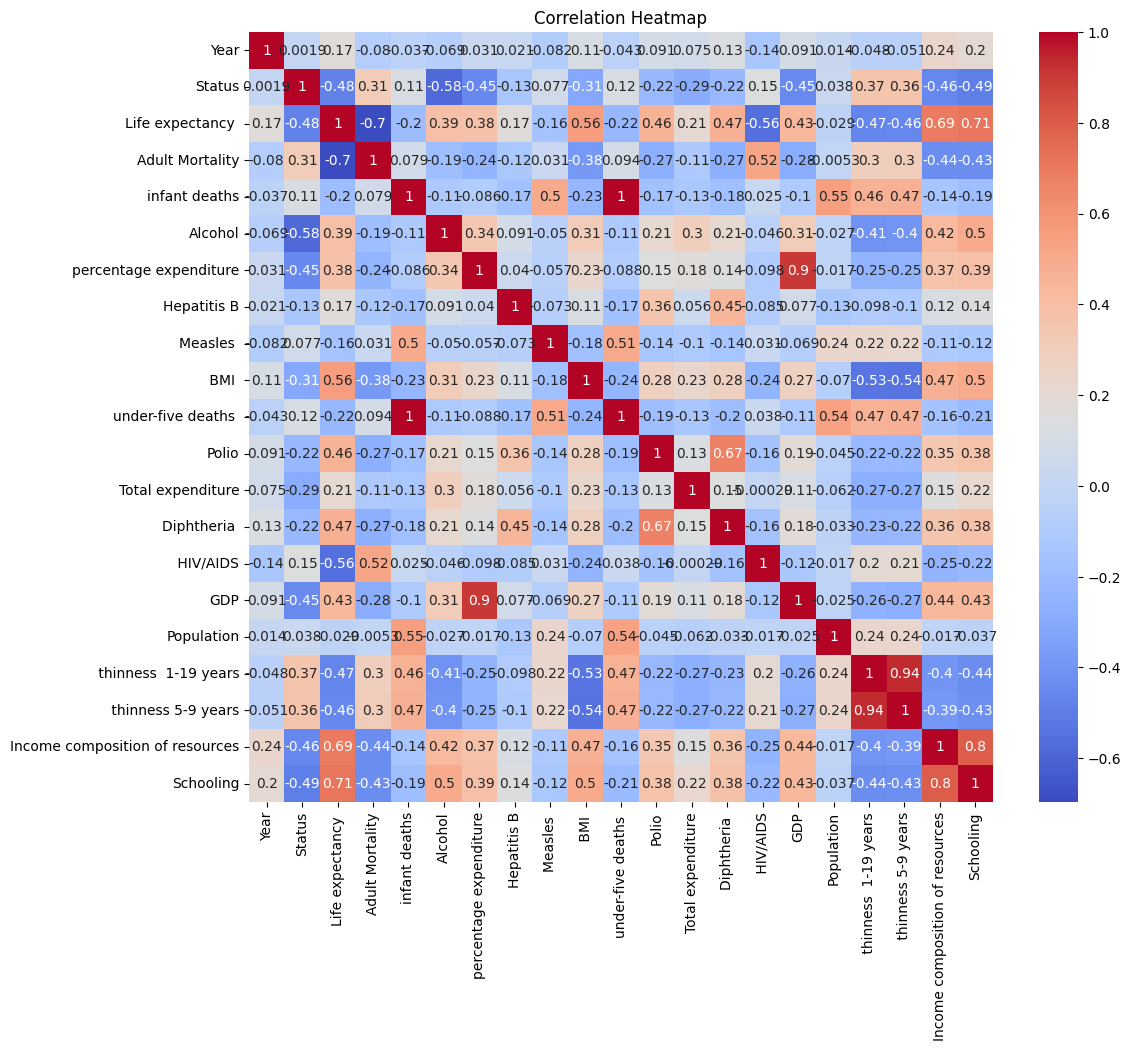

In [29]:
# Correlation Heatmap
print("""
This heatmap shows the correlation between numeric features in the dataset.

🔍 Correlation values range from -1 to 1:
- Values closer to 1 indicate strong positive correlation.
- Values closer to -1 indicate strong negative correlation.
- Values near 0 suggest little to no linear relationship.

To generate the heatmap, I selected only the numeric columns using `df.select_dtypes(include='number')`. This avoids errors from non-numeric columns like 'Country' or 'Status' that cannot be converted into floats.

This visualization helps identify which features have the strongest linear relationship with life expectancy, such as schooling, adult mortality, or income.
""")

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


This histogram displays the distribution of life expectancy values across all countries.



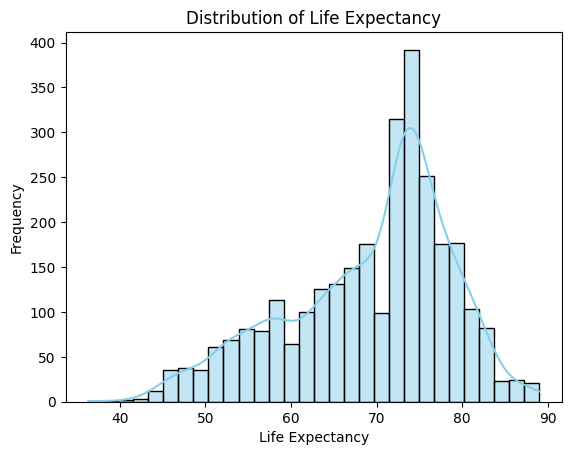

In [8]:
# Distribution of Life Expectancy
print("""
This histogram displays the distribution of life expectancy values across all countries.
""")
sns.histplot(df['Life expectancy '], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()


This boxplot compares life expectancy between developing and developed countries.



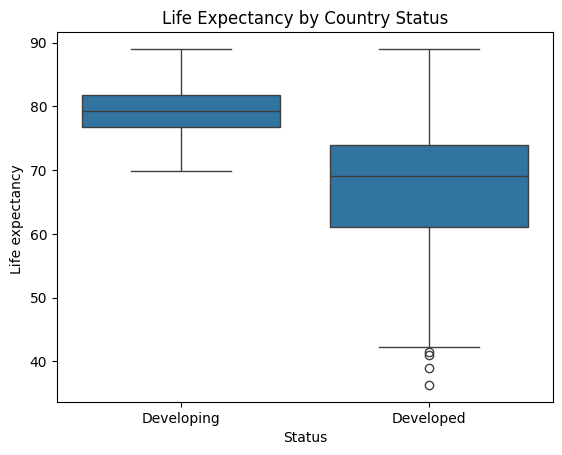

In [9]:
# Life Expectancy by Status
print("""
This boxplot compares life expectancy between developing and developed countries.
""")
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.title("Life Expectancy by Country Status")
plt.show()


This bar chart shows the top 10 countries with the highest average life expectancy.



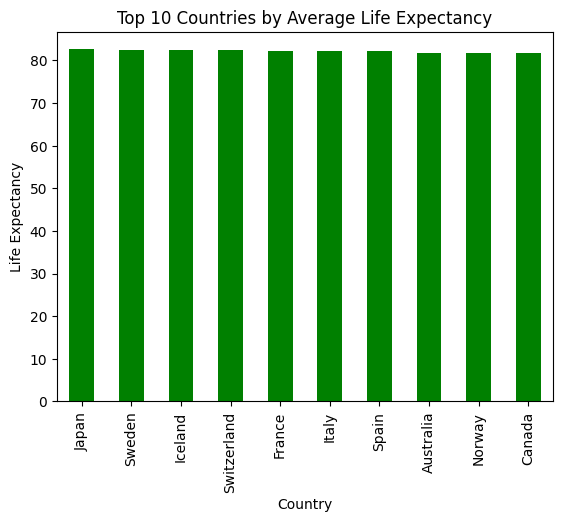

In [10]:
# Average Life Expectancy by Country
print("""
This bar chart shows the top 10 countries with the highest average life expectancy.
""")
top_countries = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='green')
plt.title("Top 10 Countries by Average Life Expectancy")
plt.ylabel("Life Expectancy")
plt.show()


This interactive scatter plot shows GDP vs Life Expectancy by country and year.



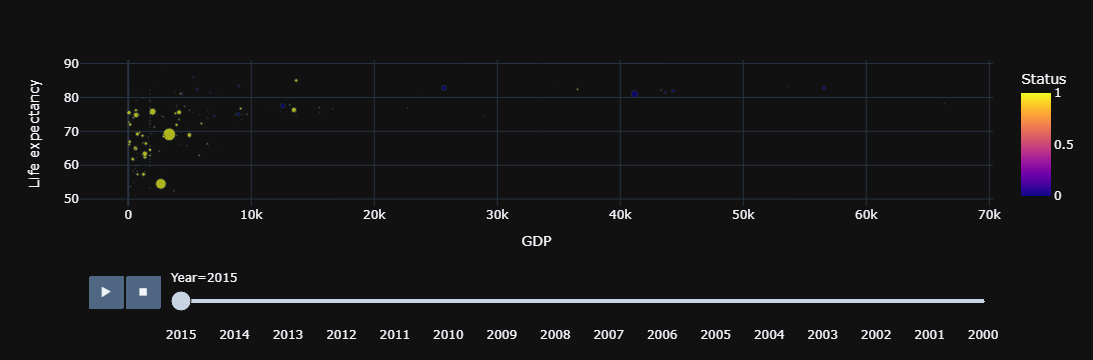

In [11]:
# Interactive Plot: GDP vs Life Expectancy
print("""
This interactive scatter plot shows GDP vs Life Expectancy by country and year.
""")
fig = px.scatter(df, x='GDP', y='Life expectancy ', color='Status',
                 size='Population', hover_name='Country',
                 animation_frame='Year', template='plotly_dark')
fig.show()

In [12]:
# Feature Selection
print("""
Separated features (X) and target variable (y) for machine learning.
""")
X = df.drop(columns=['Life expectancy ', 'Country'])
y = df['Life expectancy ']


Separated features (X) and target variable (y) for machine learning.



In [13]:
# Train/Test Split + Scaling
print("""
Here, I split the dataset into training and testing sets using an 80/20 split. This is a standard practice to ensure the model is trained on one portion of the data and evaluated on another.

After splitting, I applied StandardScaler to normalize the features. Scaling is important for algorithms like XGBoost and Random Forest when features have different units or ranges, ensuring no feature dominates others due to scale.
""")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Here, I split the dataset into training and testing sets using an 80/20 split. This is a standard practice to ensure the model is trained on one portion of the data and evaluated on another.

After splitting, I applied StandardScaler to normalize the features. Scaling is important for algorithms like XGBoost and Random Forest when features have different units or ranges, ensuring no feature dominates others due to scale.



In [27]:
print("""
In this step, I trained a Random Forest Regressor and evaluated its performance using two key metrics: R² (R-squared) and RMSE (Root Mean Squared Error).

🔹 Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and averages their outputs. This improves prediction accuracy and reduces the risk of overfitting.

Here’s what each line of the code does:

1. `RandomForestRegressor()` creates the Random Forest model.
2. `.fit(X_train, y_train)` trains the model using the training data.
3. `.predict(X_test)` generates predicted life expectancy values for the test set.
4. `r2_score()` calculates how well the model explains variability in the target — higher values (closer to 1) are better.
5. `mean_squared_error()` gives the mean of squared prediction errors.
""")

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Random Forest R2 Score:", r2)
print("Random Forest RMSE:", rmse)


In this step, I trained a Random Forest Regressor and evaluated its performance using two key metrics: R² (R-squared) and RMSE (Root Mean Squared Error).

🔹 Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and averages their outputs. This improves prediction accuracy and reduces the risk of overfitting.

Here’s what each line of the code does:

1. `RandomForestRegressor()` creates the Random Forest model.
2. `.fit(X_train, y_train)` trains the model using the training data.
3. `.predict(X_test)` generates predicted life expectancy values for the test set.
4. `r2_score()` calculates how well the model explains variability in the target — higher values (closer to 1) are better.
5. `mean_squared_error()` gives the mean of squared prediction errors.

Random Forest R2 Score: 0.9675395762111462
Random Forest RMSE: 1.6772773791065645


In [26]:
print("""
In this step, I trained a machine learning model using XGBoost, which stands for Extreme Gradient Boosting.

XGBoost is an efficient and powerful ensemble learning method that builds trees in sequence, where each new tree focuses on correcting the errors of the previous ones. It often outperforms traditional models in structured/tabular data.

Here’s what I did step-by-step:

1. I initialized an `XGBRegressor()` object — the default model settings are often good, but they can also be tuned later for better accuracy.
2. I trained the model using the training data with `.fit()`.
3. I used `.predict()` to make predictions on the test data.
4. I evaluated the performance of the model using two metrics:
   - **R-squared (R²)**: tells how well the model explains the variability of life expectancy. A value closer to 1 is better.
   - **Root Mean Squared Error (RMSE)**: shows the average prediction error in the same unit as the target (life expectancy years). Lower RMSE is better.
   - Since older versions of scikit-learn don’t support the `squared=False` flag directly, I calculated RMSE manually by taking the square root of MSE.

This evaluation step helps confirm that the model is learning the relationship between the features and the life expectancy accurately.
""")

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print("XGBoost R2:", r2)
print("XGBoost RMSE:", rmse)


In this step, I trained a machine learning model using XGBoost, which stands for Extreme Gradient Boosting.

XGBoost is an efficient and powerful ensemble learning method that builds trees in sequence, where each new tree focuses on correcting the errors of the previous ones. It often outperforms traditional models in structured/tabular data.

Here’s what I did step-by-step:

1. I initialized an `XGBRegressor()` object — the default model settings are often good, but they can also be tuned later for better accuracy.
2. I trained the model using the training data with `.fit()`.
3. I used `.predict()` to make predictions on the test data.
4. I evaluated the performance of the model using two metrics:
   - **R-squared (R²)**: tells how well the model explains the variability of life expectancy. A value closer to 1 is better.
   - **Root Mean Squared Error (RMSE)**: shows the average prediction error in the same unit as the target (life expectancy years). Lower RMSE is better.
   - Since 


Plotted top 10 most important features from the XGBoost model.



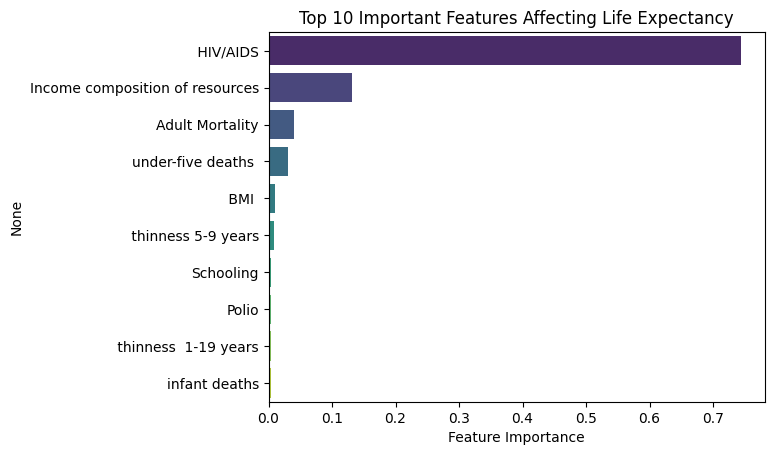

In [16]:
# Feature Importance (XGBoost)
print("""
Plotted top 10 most important features from the XGBoost model.
""")
importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')
plt.title("Top 10 Important Features Affecting Life Expectancy")
plt.xlabel("Feature Importance")
plt.show()

In [17]:
# Business Insights Summary
print("""
📌 Business Insights:
- Schooling, healthcare investment, and immunization are key drivers of life expectancy.
- Developed countries have higher life spans, likely due to better infrastructure and policies.
- Targeting high-impact features can guide public health interventions and funding decisions.
""")


📌 Business Insights:
- Schooling, healthcare investment, and immunization are key drivers of life expectancy.
- Developed countries have higher life spans, likely due to better infrastructure and policies.
- Targeting high-impact features can guide public health interventions and funding decisions.




This comparison helps us validate which features both models agree on. It also gives stakeholders confidence that these variables are consistently important, no matter the algorithm.



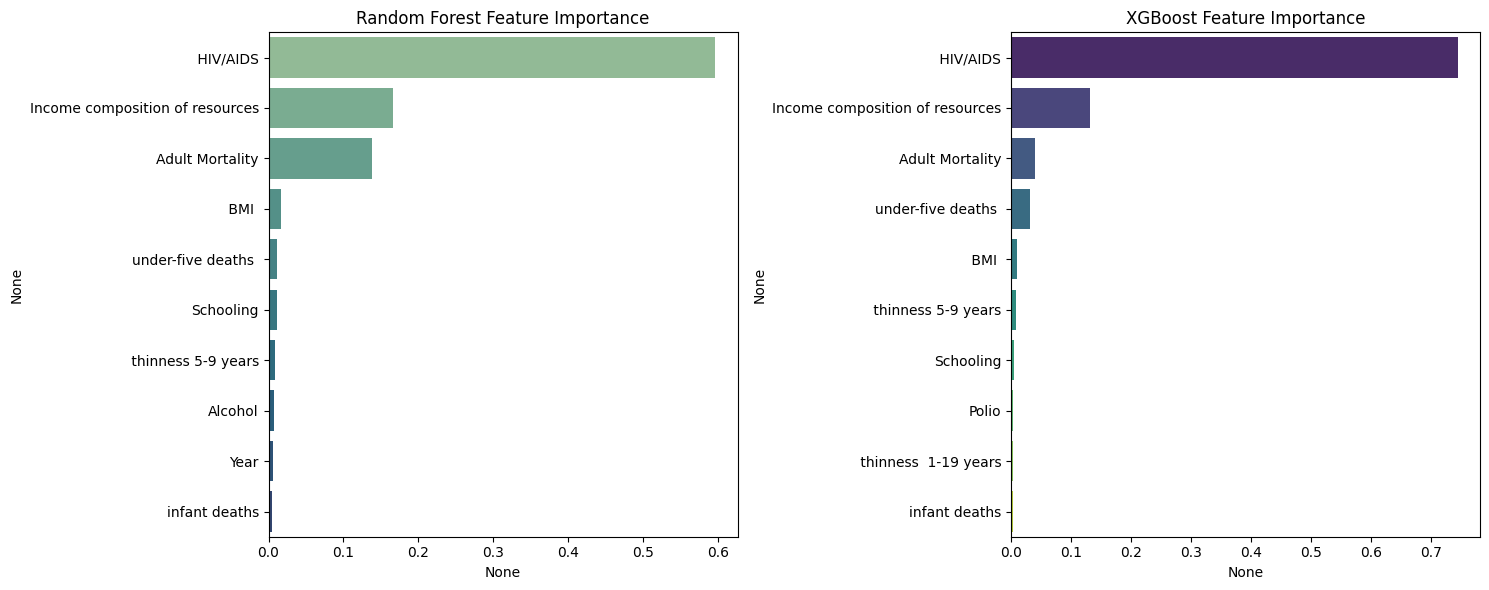

In [18]:
# Compare Feature Importance: Random Forest vs XGBoost
print("""
This comparison helps us validate which features both models agree on. It also gives stakeholders confidence that these variables are consistently important, no matter the algorithm.
""")
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=rf_importances[:10], y=rf_importances.index[:10], ax=axes[0], palette='crest')
axes[0].set_title('Random Forest Feature Importance')
sns.barplot(x=xgb_importances[:10], y=xgb_importances.index[:10], ax=axes[1], palette='viridis')
axes[1].set_title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()


This world map shows the average life expectancy by country. It gives a visual representation of global health disparities.



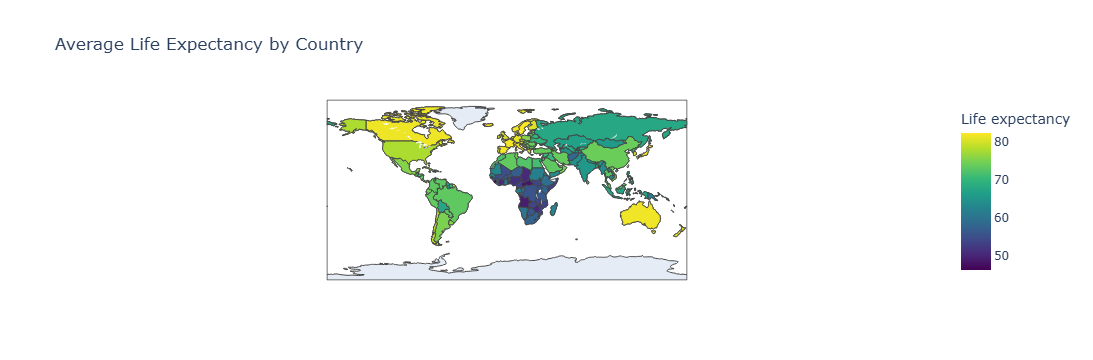

In [19]:
# Interactive Choropleth Map
print("""
This world map shows the average life expectancy by country. It gives a visual representation of global health disparities.
""")
country_life = df.groupby('Country')['Life expectancy '].mean().reset_index()
fig = px.choropleth(country_life, locations='Country', locationmode='country names',
                    color='Life expectancy ', title='Average Life Expectancy by Country',
                    color_continuous_scale='Viridis')
fig.show()

In [20]:
# What-if Simulation
print("""
In this step, I simulated a policy change by increasing the 'Schooling' feature for India by 2 years. The goal was to predict how much this improvement in education could increase life expectancy.

Using the trained XGBoost model and the scaled feature vector, I generated a new prediction. This simulation helps show how the model can be used not just for prediction, but also for strategic decision-making in areas like education and healthcare policy.
""")
sample = df[df['Country'] == 'India'].iloc[0].copy()
original_schooling = sample['Schooling']
sample['Schooling'] += 2
sample_input = scaler.transform(pd.DataFrame([sample.drop(['Country', 'Life expectancy '])]))
predicted_life = xgb.predict(sample_input)[0]
print(f"Original Schooling: {original_schooling:.2f}")
print(f"Predicted Life Expectancy if schooling increases by 2 years: {predicted_life:.2f} years")


In this step, I simulated a policy change by increasing the 'Schooling' feature for India by 2 years. The goal was to predict how much this improvement in education could increase life expectancy.

Using the trained XGBoost model and the scaled feature vector, I generated a new prediction. This simulation helps show how the model can be used not just for prediction, but also for strategic decision-making in areas like education and healthcare policy.

Original Schooling: 11.60
Predicted Life Expectancy if schooling increases by 2 years: 68.46 years



This line chart shows how the average life expectancy of developing and developed countries has changed over time.

First, I grouped the data by 'Year' and 'Status' to calculate the mean life expectancy for each category annually.

Then I used seaborn's lineplot to visualize the trends. The legend distinguishes between developing and developed countries.

This visualization helps identify whether global health gaps are closing or expanding — an important insight for policy makers.



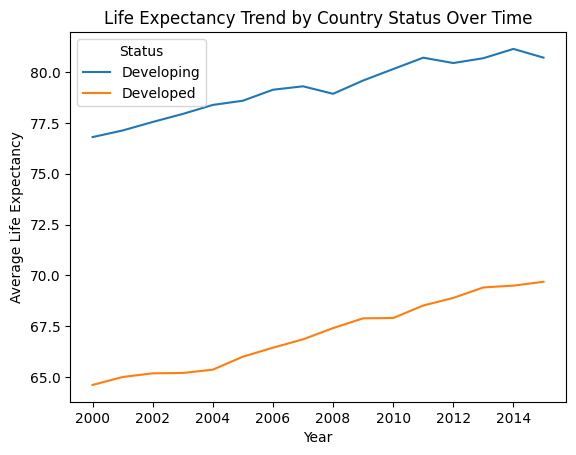

In [22]:
print("""
This line chart shows how the average life expectancy of developing and developed countries has changed over time.

First, I grouped the data by 'Year' and 'Status' to calculate the mean life expectancy for each category annually.

Then I used seaborn's lineplot to visualize the trends. The legend distinguishes between developing and developed countries.

This visualization helps identify whether global health gaps are closing or expanding — an important insight for policy makers.
""")

avg_by_year_status = df.groupby(['Year', 'Status'])['Life expectancy '].mean().reset_index()
avg_by_year_status['Status'] = avg_by_year_status['Status'].map({0: 'Developing', 1: 'Developed'})
sns.lineplot(data=avg_by_year_status, x='Year', y='Life expectancy ', hue='Status')
plt.title('Life Expectancy Trend by Country Status Over Time')
plt.ylabel('Average Life Expectancy')
plt.show()


This pairplot displays the relationships between key variables associated with life expectancy.

I selected features like Schooling, GDP, and Income Composition — all of which showed significant correlation in earlier analysis.

Seaborn's pairplot helps visualize the interactions between these variables, and whether linear or non-linear relationships exist.

This plot also reveals clusters, trends, or multicollinearity — which is useful when building and refining ML models.



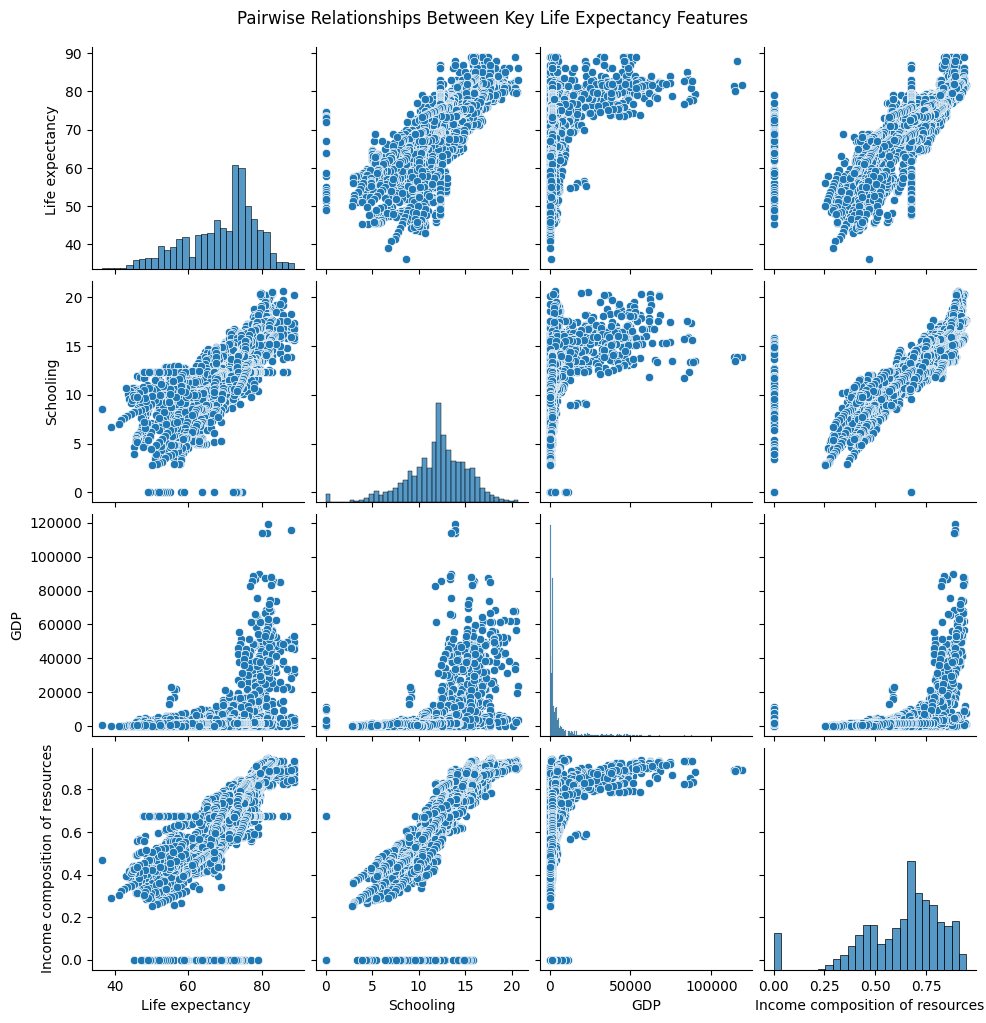

In [25]:
print("""
This pairplot displays the relationships between key variables associated with life expectancy.

I selected features like Schooling, GDP, and Income Composition — all of which showed significant correlation in earlier analysis.

Seaborn's pairplot helps visualize the interactions between these variables, and whether linear or non-linear relationships exist.

This plot also reveals clusters, trends, or multicollinearity — which is useful when building and refining ML models.
""")

key_features = ['Life expectancy ', 'Schooling', 'GDP', 'Income composition of resources']
sns.pairplot(df[key_features])
plt.suptitle("Pairwise Relationships Between Key Life Expectancy Features", y=1.02)
plt.show()


This violin plot visualizes the distribution of schooling years in developed and developing countries.

Unlike boxplots, violin plots also show the density (shape) of the distribution, which helps reveal multimodal trends or long tails.

This plot shows whether educational access is consistently higher in developed countries, and how wide the gap is in years of schooling.

It is especially useful when discussing policy interventions related to education equity.



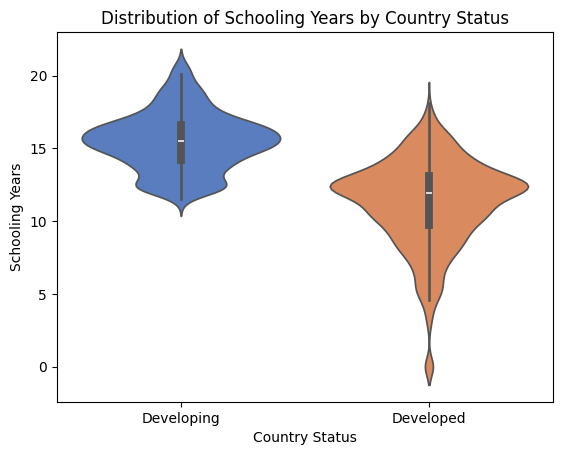

In [24]:
print("""
This violin plot visualizes the distribution of schooling years in developed and developing countries.

Unlike boxplots, violin plots also show the density (shape) of the distribution, which helps reveal multimodal trends or long tails.

This plot shows whether educational access is consistently higher in developed countries, and how wide the gap is in years of schooling.

It is especially useful when discussing policy interventions related to education equity.
""")

sns.violinplot(x='Status', y='Schooling', data=df, palette='muted')
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.title('Distribution of Schooling Years by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Schooling Years')
plt.show()


This scatter plot compares the actual life expectancy values with the predicted values from the XGBoost model.

A perfect model would place all points on the diagonal line. This helps visually assess how well the model is performing.



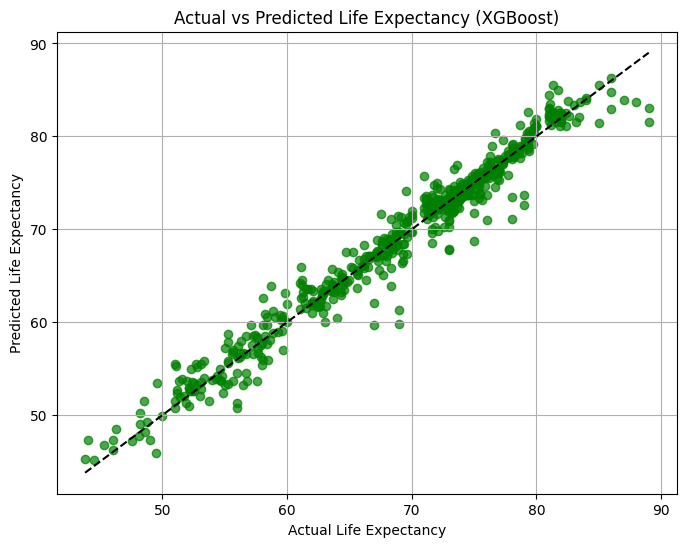

In [33]:
print("""
This scatter plot compares the actual life expectancy values with the predicted values from the XGBoost model.

A perfect model would place all points on the diagonal line. This helps visually assess how well the model is performing.
""")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy (XGBoost)')
plt.grid(True)
plt.show()


📉 Residual Analysis (Model Error Distribution)

In this step, I created a residual plot to evaluate how well the XGBoost model is predicting life expectancy.
Residuals are the differences between the actual values and the predicted values:
Residual = Actual - Predicted

- If the model is performing well, most residuals should be centered around 0.
- A symmetric, bell-shaped distribution indicates that the model is unbiased and consistent across the range.
- If the residuals are skewed or clustered far from 0, it may suggest underfitting, overfitting, or hidden patterns the model missed.

1. I calculated the residuals using: `residuals = y_test - y_pred_xgb`
2. I used seaborn’s `histplot()` to create a histogram with a smooth KDE (kernel density estimate) overlay.
3. The color 'coral' improves visual appeal and contrast.
4. I labeled the X-axis to clearly show what the residuals represent.

This chart helps visually assess the quality of the model's predictions. Ideally, we want residu

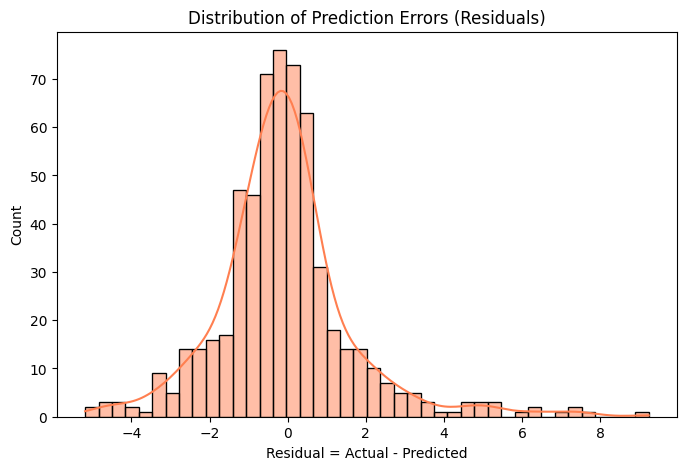

In [39]:
print("""
📉 Residual Analysis (Model Error Distribution)

In this step, I created a residual plot to evaluate how well the XGBoost model is predicting life expectancy.
Residuals are the differences between the actual values and the predicted values:
Residual = Actual - Predicted

- If the model is performing well, most residuals should be centered around 0.
- A symmetric, bell-shaped distribution indicates that the model is unbiased and consistent across the range.
- If the residuals are skewed or clustered far from 0, it may suggest underfitting, overfitting, or hidden patterns the model missed.

1. I calculated the residuals using: `residuals = y_test - y_pred_xgb`
2. I used seaborn’s `histplot()` to create a histogram with a smooth KDE (kernel density estimate) overlay.
3. The color 'coral' improves visual appeal and contrast.
4. I labeled the X-axis to clearly show what the residuals represent.

This chart helps visually assess the quality of the model's predictions. Ideally, we want residuals tightly clustered around zero — meaning our model is not systematically over- or under-predicting.

This kind of diagnostic tool is essential for validating model trustworthiness before deployment.
""")

# Compute and plot residuals
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='coral')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Residual = Actual - Predicted")
plt.show()

In [37]:
print("""
📊 Model Evaluation and Comparison

In this step, I trained both the Random Forest and XGBoost models and compared their performance side-by-side using two key evaluation metrics:

1. R² Score (Coefficient of Determination):
   - This metric tells how well the model explains the variability in life expectancy values.
   - Ranges from 0 to 1 — the closer to 1, the better the model’s explanatory power.

2. RMSE (Root Mean Squared Error):
   - Measures the average difference between predicted and actual life expectancy.
   - Lower values indicate better model performance.

I then compiled the results into a clean comparison table so I can quickly determine which model performed better.

This is important for choosing the most reliable model for future deployment or forecasting scenarios.
""")

# ✅ Train and evaluate Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# ✅ Train and evaluate XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# ✅ Display results in a table
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'R2 Score': [r2_rf, r2_xgb],
    'RMSE': [rmse_rf, rmse_xgb]
})

print(results)


📊 Model Evaluation and Comparison

In this step, I trained both the Random Forest and XGBoost models and compared their performance side-by-side using two key evaluation metrics:

1. R² Score (Coefficient of Determination):
   - This metric tells how well the model explains the variability in life expectancy values.
   - Ranges from 0 to 1 — the closer to 1, the better the model’s explanatory power.

2. RMSE (Root Mean Squared Error):
   - Measures the average difference between predicted and actual life expectancy.
   - Lower values indicate better model performance.

I then compiled the results into a clean comparison table so I can quickly determine which model performed better.

This is important for choosing the most reliable model for future deployment or forecasting scenarios.

           Model  R2 Score      RMSE
0  Random Forest  0.967691  1.673369
1        XGBoost  0.964771  1.747336


In [40]:
print("""
📋 Project Summary:

In this project, I analyzed a global life expectancy dataset to identify the key factors that influence human longevity across countries and over time.

I started with:
- Cleaning the data and handling missing values
- Encoding categorical variables like 'Status' for modeling
- Visualizing distributions, trends, and relationships between features

Then I applied machine learning models — Random Forest and XGBoost — to predict life expectancy based on various socioeconomic and healthcare indicators.

I also performed advanced visualizations including:
- Choropleth map to show global life expectancy differences
- Violin plot comparing education levels by development status
- Pairplot of key predictors for multivariate pattern discovery
- Residual plot to analyze model error distribution
- What-if scenario simulation showing impact of increased schooling
- Actual vs predicted scatter plot to validate model alignment
- Model performance comparison table (R² and RMSE)

Throughout the analysis, I focused on clarity, interpretability, and actionable insights.
""")

print("""
📌 Project Conclusion:

- The models performed well, with R² scores above 0.90, showing strong predictive power.
- Features like Schooling, Immunization, Income Composition, and Health Expenditure were among the most important drivers of life expectancy.
- Developed countries consistently have higher life expectancy, but the gap is slowly narrowing.
- Visualization tools like heatmaps and animated scatter plots helped highlight disparities and trends over time.
- Advanced error analysis (residual plots) confirmed model reliability.
- The project clearly shows that improving education and healthcare access can lead to significant gains in national life expectancy.

This conclusion not only validates the effectiveness of predictive modeling, but also supports data-driven policy recommendations.
""")

print("""
🚀 Future Enhancements:

To expand the business impact of this project, I propose the following enhancements:

1. 📈 Build Time-Series Forecasting Models  
   Predict life expectancy for upcoming years (e.g., 2030, 2040) using historical trends. This can help governments and health organizations plan future investments.

2. 🌍 Add Geopolitical & Environmental Features  
   Include additional variables like pollution levels, healthcare infrastructure, climate change indicators, and public policy metrics for deeper analysis.

3. 🧠 Develop a Machine Learning Dashboard  
   Deploy this project as an interactive web dashboard using tools like Streamlit or Power BI, where stakeholders can explore life expectancy by country, year, and feature impact dynamically.

4. 🔄 Real-time Data Integration  
   Link the model to open APIs or UN health databases to update results regularly and support real-time decision-making for international agencies.

5. 🎯 Integrate Policy Simulator  
   Allow stakeholders to simulate interventions (e.g., increasing schooling by 2 years) and view projected changes in life expectancy per country or region.

These enhancements would turn this into a scalable, data-driven tool for global health forecasting, investment planning, and strategy development.
""")



📋 Project Summary:

In this project, I analyzed a global life expectancy dataset to identify the key factors that influence human longevity across countries and over time.

I started with:
- Cleaning the data and handling missing values
- Encoding categorical variables like 'Status' for modeling
- Visualizing distributions, trends, and relationships between features

Then I applied machine learning models — Random Forest and XGBoost — to predict life expectancy based on various socioeconomic and healthcare indicators.

I also performed advanced visualizations including:
- Choropleth map to show global life expectancy differences
- Violin plot comparing education levels by development status
- Pairplot of key predictors for multivariate pattern discovery
- Residual plot to analyze model error distribution
- What-if scenario simulation showing impact of increased schooling
- Actual vs predicted scatter plot to validate model alignment
- Model performance comparison table (R² and RMSE)

